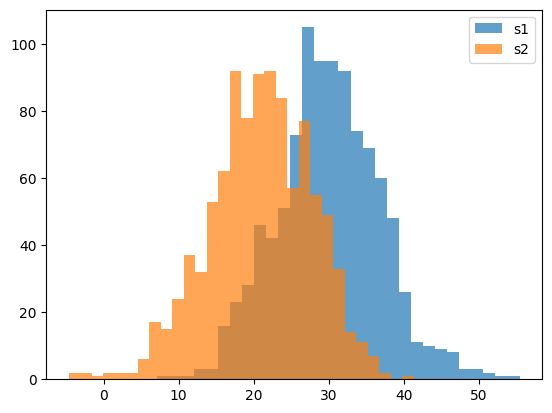

In [81]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Set up hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players
beta = 4.166  # variance for performance difference

#t is initial guess, intial guess of t used to sample from s1, s2 --> then t. (t is given)

# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t


# Step 2: Gibbs Sampler core
def gibbs_sampler(num_iterations, y):
    # Initialize s1 and s2 with their prior means
    s1 = mu
    s2 = mu
    t = 0 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []
    iterations = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu, sigma, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu, sigma, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists
        samples_s1.append(s1)
        samples_s2.append(s2)
        iterations.append(i)

    return np.array(samples_s1), np.array(samples_s2), iterations

# Example: Run Gibbs Sampler with 1000 iterations
num_iterations = 1000
y = 1  # Player 1 wins
samples_s1, samples_s2, iterations = gibbs_sampler(num_iterations, y)

# Plot histograms of the samples for s1 and s2
plt.figure(1)
plt.hist(samples_s1, bins=30, alpha=0.7, label='s1')
plt.hist(samples_s2, bins=30, alpha=0.7, label='s2')
plt.legend()
plt.show()

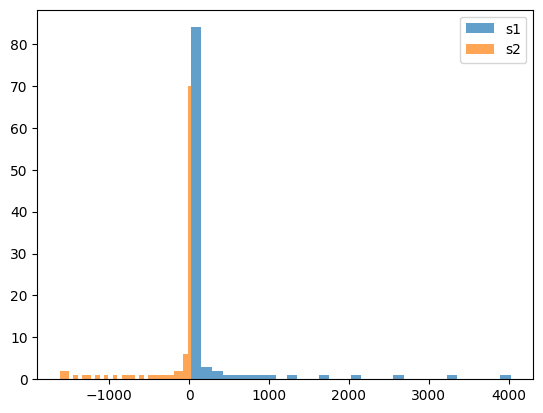

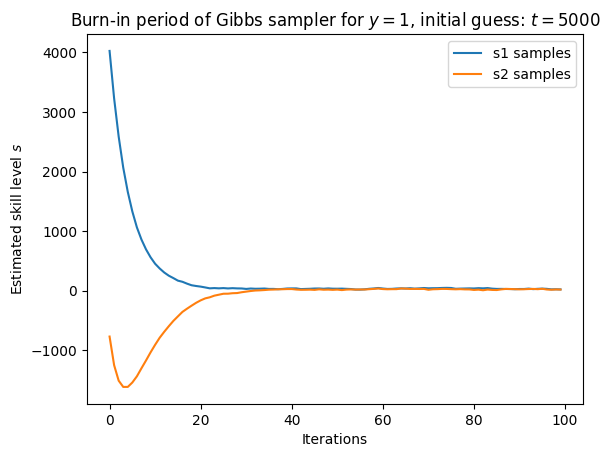

In [76]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Set up hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players
beta = 4.166  # variance for performance difference

#t is initial guess, intial guess of t used to sample from s1, s2 --> then t. (t is given)

# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t


# Step 2: Gibbs Sampler core
def gibbs_sampler(num_iterations, y):
    # Initialize s1 and s2 with their prior means
    s1 = mu
    s2 = mu
    t = 5000 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []
    iterations = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu, sigma, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu, sigma, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists
        samples_s1.append(s1)
        samples_s2.append(s2)
        iterations.append(i)

    return np.array(samples_s1), np.array(samples_s2), iterations

# Example: Run Gibbs Sampler with 1000 iterations
num_iterations = 100
y = 1  # Player 1 wins
samples_s1, samples_s2, iterations = gibbs_sampler(num_iterations, y)

# Plot histograms of the samples for s1 and s2
plt.figure(1)
plt.hist(samples_s1, bins=30, alpha=0.7, label='s1')
plt.hist(samples_s2, bins=30, alpha=0.7, label='s2')
plt.legend()

plt.figure(2)
plt.title(r"Burn-in period of Gibbs sampler for $y=1$, initial guess: $t = 5000$")
plt.xlabel("Iterations")
plt.ylabel(r"Estimated skill level $s$")
plt.plot(iterations, samples_s1, label ='s1 samples')
plt.plot(iterations, samples_s2, label ='s2 samples')
# plt.axvline(x=burn_in, color='red', linestyle='--', label='Burn-in threshold', alpha=0.4)
plt.legend()
plt.show()

In [ ]:
# Loading in the raw SerieA file url from Github
#Can be accessed from: https://github.com/dannem1337/APML-Project/blob/main/data/SerieA.csv
#Copy "Raw"
import pandas as pd

url = 'https://raw.githubusercontent.com/dannem1337/APML-Project/refs/heads/main/data/SerieA.csv?token=GHSAT0AAAAAACXOR42XGDIB5VURMFHQ3UHEZXSOHHQ'
serieA = pd.read_csv(url, na_values='?', dtype={'ID': str}).dropna()
print(serieA)

     yyyy-mm-dd  HH:MM       team1     team2  score1  score2
0    2018-08-18  18:00      Chievo  Juventus       2       3
1    2018-08-18  20:30       Lazio    Napoli       1       2
2    2018-08-19  18:00      Torino      Roma       0       1
3    2018-08-19  20:30    Sassuolo     Inter       1       0
4    2018-08-19  20:30       Parma   Udinese       2       2
..          ...    ...         ...       ...     ...     ...
375  2019-05-26  20:30        Roma     Parma       2       1
376  2019-05-26  20:30       Inter    Empoli       2       1
377  2019-05-26  20:30  Fiorentina     Genoa       0       0
378  2019-05-26  20:30    Cagliari   Udinese       1       2
379  2019-05-26  20:30    Atalanta  Sassuolo       3       1

[380 rows x 6 columns]


In [ ]:
serieA['winner'] = serieA.apply(lambda x: x['team2'] if x['score1'] < x['score2']
                     else (x['team1'] if x['score1'] > x['score2'] else 'TIE'), axis=1)

# Drop rows with 'TIE'
serieA.drop(serieA.loc[serieA['winner'] == 'TIE'].index, inplace=True)

# Reset index and reassign
serieA.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(serieA)

     yyyy-mm-dd  HH:MM     team1     team2  score1  score2    Winner
0    2018-08-18  18:00    Chievo  Juventus       2       3  Juventus
1    2018-08-18  20:30     Lazio    Napoli       1       2    Napoli
2    2018-08-19  18:00    Torino      Roma       0       1      Roma
3    2018-08-19  20:30  Sassuolo     Inter       1       0  Sassuolo
4    2018-08-19  20:30    Empoli  Cagliari       2       0    Empoli
..          ...    ...       ...       ...     ...     ...       ...
267  2019-05-26  20:30      Spal     Milan       2       3     Milan
268  2019-05-26  20:30      Roma     Parma       2       1      Roma
269  2019-05-26  20:30     Inter    Empoli       2       1     Inter
270  2019-05-26  20:30  Cagliari   Udinese       1       2   Udinese
271  2019-05-26  20:30  Atalanta  Sassuolo       3       1  Atalanta

[272 rows x 7 columns]


In [ ]:
teams1 = serieA['team1'].unique()

All_teams = sorted(teams1)

#Hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players
beta = 4.166  # variance for performance difference

All_teams_dict = {}

for i in All_teams:
    All_teams_dict[i] = mu, sigma

All_teams_dict

{'Atalanta': (25, 8.333),
 'Bologna': (25, 8.333),
 'Cagliari': (25, 8.333),
 'Chievo': (25, 8.333),
 'Empoli': (25, 8.333),
 'Fiorentina': (25, 8.333),
 'Frosinone': (25, 8.333),
 'Genoa': (25, 8.333),
 'Inter': (25, 8.333),
 'Juventus': (25, 8.333),
 'Lazio': (25, 8.333),
 'Milan': (25, 8.333),
 'Napoli': (25, 8.333),
 'Parma': (25, 8.333),
 'Roma': (25, 8.333),
 'Sampdoria': (25, 8.333),
 'Sassuolo': (25, 8.333),
 'Spal': (25, 8.333),
 'Torino': (25, 8.333),
 'Udinese': (25, 8.333)}

In [ ]:
game1 = serieA.iloc[0][['team1', 'team2', 'Winner']].to_list()
print(game1)

for i in game1:
    print(f"{i} : {All_teams_dict[i]}")

['Chievo', 'Juventus', 'Juventus']
Chievo : (25, 8.333)
Juventus : (25, 8.333)
Juventus : (25, 8.333)


In [ ]:
for index, row in serieA.iterrows():
    print(row['team1'], row['team2'], row['Winner'])

In [ ]:
for index, row in serieA.iterrows():
    print(row['team1'], row['team2'], row['Winner'])

beta = 4.166  # variance for performance difference

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t

# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Step 2: Gibbs Sampler core
def gibbs_sampler(num_iterations, y):
    # Initialize s1 and s2 with their prior means
    s1 = 30 #Initial guess
    s2 = 30 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []
    iterations = []

    for i in range(num_iterations):
        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu, sigma, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu, sigma, beta)

        # Append samples to lists
        samples_s1.append(s1)
        samples_s2.append(s2)
        iterations.append(i)

    return np.array(samples_s1), np.array(samples_s2), iterations

# Example: Run Gibbs Sampler with 1000 iterations
num_iterations = 1000
y = 1  # Player 1 wins
samples_s1, samples_s2, iterations = gibbs_sampler(num_iterations, y)

# Plot histograms of the samples for s1 and s2
plt.figure(1)
plt.hist(samples_s1, bins=30, alpha=0.7, label='s1')
plt.hist(samples_s2, bins=30, alpha=0.7, label='s2')
plt.legend()
plt.show()

Chievo Juventus Juventus
Lazio Napoli Napoli
Torino Roma Roma
Sassuolo Inter Sassuolo
Empoli Cagliari Empoli
Bologna Spal Spal
Atalanta Frosinone Atalanta
Juventus Lazio Juventus
Napoli Milan Napoli
Spal Parma Spal
Udinese Sampdoria Udinese
Genoa Empoli Genoa
Fiorentina Chievo Fiorentina
Milan Roma Milan
Bologna Inter Inter
Parma Juventus Juventus
Fiorentina Udinese Fiorentina
Torino Spal Torino
Sassuolo Genoa Sassuolo
Sampdoria Napoli Sampdoria
Lazio Frosinone Lazio
Atalanta Cagliari Cagliari
Inter Parma Parma
Napoli Fiorentina Napoli
Frosinone Sampdoria Sampdoria
Juventus Sassuolo Juventus
Genoa Bologna Genoa
Empoli Lazio Lazio
Spal Atalanta Spal
Sassuolo Empoli Sassuolo
Parma Cagliari Parma
Fiorentina Spal Fiorentina
Sampdoria Inter Inter
Torino Napoli Napoli
Lazio Genoa Lazio
Chievo Udinese Udinese
Bologna Roma Bologna
Frosinone Juventus Juventus
Inter Fiorentina Inter
Udinese Lazio Lazio
Roma Frosinone Roma
Napoli Parma Napoli
Juventus Bologna Juventus
Genoa Chievo Genoa
Spal Sass